In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder


In [165]:
df1=pd.read_csv("/content/pune house data.csv")
df1.head()

,area_type,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4 BHK,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [166]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   size           13304 non-null  object 
 2   society        7818 non-null   object 
 3   total_sqft     13320 non-null  object 
 4   bath           13247 non-null  float64
 5   balcony        12711 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13319 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB
None


In [167]:
df1.shape

(13320, 8)

In [168]:
df1.columns

Index(['area_type', 'size', 'society', 'total_sqft', 'bath', 'balcony',
       'price', 'site_location'],
      dtype='object')

In [169]:
df2 = df1.drop(['area_type','society','balcony'],axis='columns') # features that are not required to build our model
df2.shape

(13320, 5)

In [170]:
df2.isnull().sum()

,0
size,16
total_sqft,0
bath,73
price,0
site_location,1


In [171]:
df2.shape


(13320, 5)

In [172]:
df3 = df2.dropna()
df3.isnull().sum()
#now df3 contains 0 null characters

,0
size,0
total_sqft,0
bath,0
price,0
site_location,0


In [173]:
df3.shape

(13246, 5)

In [174]:
# Extract BHK number from 'size'
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-174-f85453145b14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [175]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [176]:
df3[~(df3['total_sqft'].apply(is_float))].head(10)
#df4 contains rows of total_sqft column contain only invalid numeric values

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 BHK,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 BHK,3090 - 5002,4.0,445.000,Alandi Road,4


In [177]:
def convert_sqft_to_num(x):
  tokens = x.split('-') #splits the value at hyphen (2100-2850 becomes ["2100","2850"])
  if len(tokens) == 2:
    return(float(tokens[0]))+float(tokens[1])/2 #mean value
  try:
    return float(x)
  except:
    return None

In [178]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)
#df4 contains rows of total_sqft column contain only valid numeric values

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 BHK,2600.0,5.0,120.00,Ambegaon Budruk,4


In [179]:
df4.loc[30]

,30
size,4 BHK
total_sqft,3525.0
bath,4.0
price,186.0
site_location,Gultekdi
bhk,4


In [180]:
df5 = df4.copy() # Adding new feature called price per square feet
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 BHK,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [181]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

,price_per_sqft
count,1.320000e+04
mean,7.903701e+03
std,1.067277e+05
min,2.678298e+02
25%,4.237918e+03
50%,5.417545e+03
75%,7.307886e+03
max,1.200000e+07


In [182]:
df5.to_csv("dataset.csv",index=False)

In [183]:
df5["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Mukund Nagar', 'Mundhawa',
       'Naga

In [184]:
# Dictionary of locations and their distances from Pune Airport
distances_airport = {
    "Alandi Road": 12,
    "Ambegaon Budruk": 21,
    "Anandnagar": 16,
    "Aundh": 14,
    "Aundh Road": 12,
    "Balaji Nagar": 15,
    "Baner": 18,
    "Baner road": 16,
    "Bhandarkar Road": 12,
    "Bhavani Peth": 9,
    "Bibvewadi": 14,
    "Bopodi": 10,
    "Budhwar Peth": 9,
    "Bund Garden Road": 7,
    "Camp": 8,
    "Chandan Nagar": 6,
    "Dapodi": 11,
    "Deccan Gymkhana": 12,
    "Dehu Road": 27,
    "Dhankawadi": 18,
    "Dhayari Phata": 20,
    "Dhole Patil Road": 6,
    "Erandwane": 14,
    "Fatima Nagar": 10,
    "Fergusson College Road": 12,
    "Ganesh Peth": 9,
    "Ganeshkhind": 12,
    "Ghorpade Peth": 9,
    "Gokhale Nagar": 12,
    "Gultekdi": 12,
    "Guruwar peth": 9,
    "Hadapsar": 12,
    "Hadapsar Industrial Estate": 13,
    "Hingne Khurd": 16,
    "Jangali Maharaj Road": 11,
    "Kalyani Nagar": 5,
    "Karve Nagar": 16,
    "Karve Road": 14,
    "Kasba Peth": 9,
    "Katraj": 19,
    "Khadaki": 11,
    "Khadki": 10,
    "Kharadi": 8,
    "Kondhwa": 14,
    "Kondhwa Budruk": 16,
    "Kondhwa Khurd": 14,
    "Koregaon Park": 7,
    "Kothrud": 14,
    "Law College Road": 12,
    "Laxmi Road": 9,
    "Lulla Nagar": 12,
    "Mahatma Gandhi Road": 9,
    "Mangalwar peth": 8,
    "Manik Bagh": 9,
    "Market yard": 12,
    "Mukund Nagar": 11,
    "Mundhawa": 7,
    "Nagar Road": 5,
    "Nana Peth": 9,
    "Narayan Peth": 10,
    "Narayangaon": 69,
    "Navi Peth": 11,
    "Padmavati": 14,
    "Parvati Darshan": 14,
    "Pashan": 17,
    "Paud Road": 15,
    "Pirangut": 25,
    "Prabhat Road": 12,
    "Pune Railway Station": 8,
    "Rasta Peth": 8,
    "Raviwar Peth": 9,
    "Sadashiv Peth": 10,
    "Sahakar Nagar": 14,
    "Salunke Vihar": 14,
    "Sasson Road": 7,
    "Satara Road": 13,
    "Senapati Bapat Road": 12,
    "Shaniwar Peth": 10,
    "Shivaji Nagar": 10,
    "Sinhagad Road": 16,
    "Somwar Peth": 9,
    "Swargate": 12,
    "Tilak Road": 12,
    "Uruli Devachi": 22,
    "Vadgaon Budruk": 18,
    "Wadgaon Sheri": 6,
    "Viman Nagar": 5,
    "Vishrant Wadi": 8,
    "Wagholi": 9,
    "Wakadewadi": 10,
    "Wanowrie": 12,
    "Warje": 16,
    "Yerawada": 6,
    "Ghorpadi": 8,
    "Model colony": 11,
    "Shukrawar Peth": 9,
    "other": 10,
}

In [185]:
distances_railway = {
    "Alandi Road": 6,
    "Ambegaon Budruk":9 ,
    "Anandnagar":4 ,
    "Aundh":4 ,
    "Aundh Road":3 ,
    "Balaji Nagar":8 ,
    "Baner": 5,
    "Baner road": 5,
    "Bhandarkar Road":1 ,
    "Bhavani Peth": 2,
    "Bibvewadi":15 ,
    "Bopodi":1 ,
    "Budhwar Peth": 1,
    "Bund Garden Road": 1,
    "Camp":2 ,
    "Chandan Nagar": 1,
    "Dapodi": 1,
    "Deccan Gymkhana":1 ,
    "Dehu Road":12 ,
    "Dhankawadi":5,
    "Dhayari Phata": 8,
    "Dhole Patil Road": 2,
    "Erandwane": 2,
    "Fatima Nagar":5 ,
    "Fergusson College Road":2 ,
    "Ganesh Peth": 2,
    "Ganeshkhind": 3,
    "Ghorpade Peth": 2,
    "other": 2,
    "Gokhale Nagar": 2,
    "Gultekdi": 2,
    "Guruwar peth": 2,
    "Hadapsar": 6,
    "Hadapsar Industrial Estate": 7,
    "Hingne Khurd": 4,
    "Jangali Maharaj Road": 2,
    "Kalyani Nagar": 3,
    "Karve Nagar": 4,
    "Karve Road": 2,
    "Kasba Peth": 2,
    "Katraj": 1,
    "Khadaki": 1,
    "Khadki": 1,
    "Kharadi": 4,
    "Kondhwa": 7,
    "Kondhwa Budruk": 8,
    "Kondhwa Khurd": 7,
    "Koregaon Park": 3,
    "Kothrud": 4,
    "Law College Road": 2,
    "Laxmi Road": 2,
    "Lulla Nagar": 6,
    "Mahatma Gandhi Road": 3,
    "Mangalwar peth": 3,
    "Manik Bagh": 4,
    "Market yard": 5,
    "Mukund Nagar": 2,
    "Mundhawa": 3,
    "Nagar Road": 5,
    "Nana Peth": 2,
    "Narayan Peth": 2,
    "Narayangaon":10,
  	"Navi Peth" :2 ,
  	"Padmavati" :5 ,
  	"Parvati Darshan" :3 ,
  	"Pashan" :6,
  	"Paud Road" :5 ,
  	"Pirangut" :7 ,
  	"Prabhat Road" :2 ,
  	"Pune Railway Station" :1 ,
  	"Rasta Peth" :1,
  	"Raviwar Peth" :1 ,
  	"Sadashiv Peth" :2 ,
  	"Sahakar Nagar" :3 ,
  	"Salunke Vihar" :7 ,
  	"Sasson Road" :1 ,
  	"Satara Road" :4 ,
  	"Senapati Bapat Road" :3 ,
  	"Shaniwar Peth" :2 ,
  	"Shivaji Nagar" :1 ,
  	"Sinhagad Road" :9 ,
  	"Somwar Peth" :2 ,
  	"Swargate" :1,
  	"Tilak Road" :2 ,
  	"Uruli Devachi" :9 ,
  	"Vadgaon Budruk" :8 ,
  	"Wadgaon Sheri" :5,
  	"Viman Nagar" :4,
  	"Vishrant Wadi" :4 ,
  	"Wagholi" :9 ,
  	"Wakadewadi" :3 ,
  	"Wanowrie" :7 ,
  	"Warje" :6 ,
  	"Yerawada" :2 ,
  	"Ghorpadi":4,
  	"Model colony":2 ,
  	"Shukrawar Peth":1 ,
}

In [186]:
df5.site_location = df5.site_location.astype(str)
df5.site_location = df5.site_location.apply(lambda X: X.strip()) #removing extra white spaces around the site_location text
site_location_stats = df5["site_location"].value_counts(ascending=False) #count of each site_location column
site_location_stats

,count
site_location,
Kasba Peth,139
Bibvewadi,139
Laxmi Road,139
Ambegaon Budruk,139
Nana Peth,139
...,...
Fatima Nagar,135
Model colony,135
Wakadewadi,134


In [187]:
site_location_stats.values.sum()

13200

In [188]:
len(site_location_stats[site_location_stats>10])

96

In [189]:
len(site_location_stats)

97

In [190]:
print(len(site_location_stats[site_location_stats<=10]))

1


In [191]:
site_location_stats_less_than_10 = site_location_stats[site_location_stats<=10]
site_location_stats_less_than_10

,count
site_location,
other,1


In [192]:
len(df5.site_location.unique())

97

In [193]:
df5.site_location = df5.site_location.apply(lambda x: 'other' if x in site_location_stats_less_than_10 else x)
len(df5.site_location.unique())

97

In [194]:
df5.head(10)

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 BHK,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000
5,2 BHK,1170.0,2.0,38.00,Balaji Nagar,2,3247.863248
6,4 BHK,2732.0,4.0,204.00,Baner,4,7467.057101
7,4 BHK,3300.0,4.0,600.00,Baner road,4,18181.818182
8,3 BHK,1310.0,3.0,63.25,Bhandarkar Road,3,4828.244275
9,6 BHK,1020.0,6.0,370.00,Bhavani Peth,6,36274.509804


In [195]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 BHK,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 BHK,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 BHK,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 BHK,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 BHK,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [196]:
df5.shape

(13200, 7)

In [197]:
#adding new column of distance from airport of each location
df5['airport_distance'] = df5['site_location'].map(distances_airport)
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft,airport_distance
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606,12
1,4 BHK,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615,21
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556,16
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861,14
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000,12


In [198]:
#adding new column of distance from nearest railway station of each location
df5['railway_distance'] = df5['site_location'].map(distances_railway)
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft,airport_distance,railway_distance
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606,12,6
1,4 BHK,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615,21,9
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556,16,4
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861,14,4
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000,12,3


In [199]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] #in df6 we store dataframes of which sqft/bhk is more than 300
df6.shape

(12456, 9)

In [200]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6290.426079
std,4175.567849
min,267.829813
25%,4186.952288
50%,5282.155160
75%,6904.652015
max,176470.588235


In [201]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('site_location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10879, 9)

In [202]:
{
'1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
'2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [203]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(7593, 9)

In [204]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
  bhk2 = df[(df.site_location==location) & (df.bhk==2) ]
  bhk3 = df[(df.site_location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 Bhk',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price(Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()


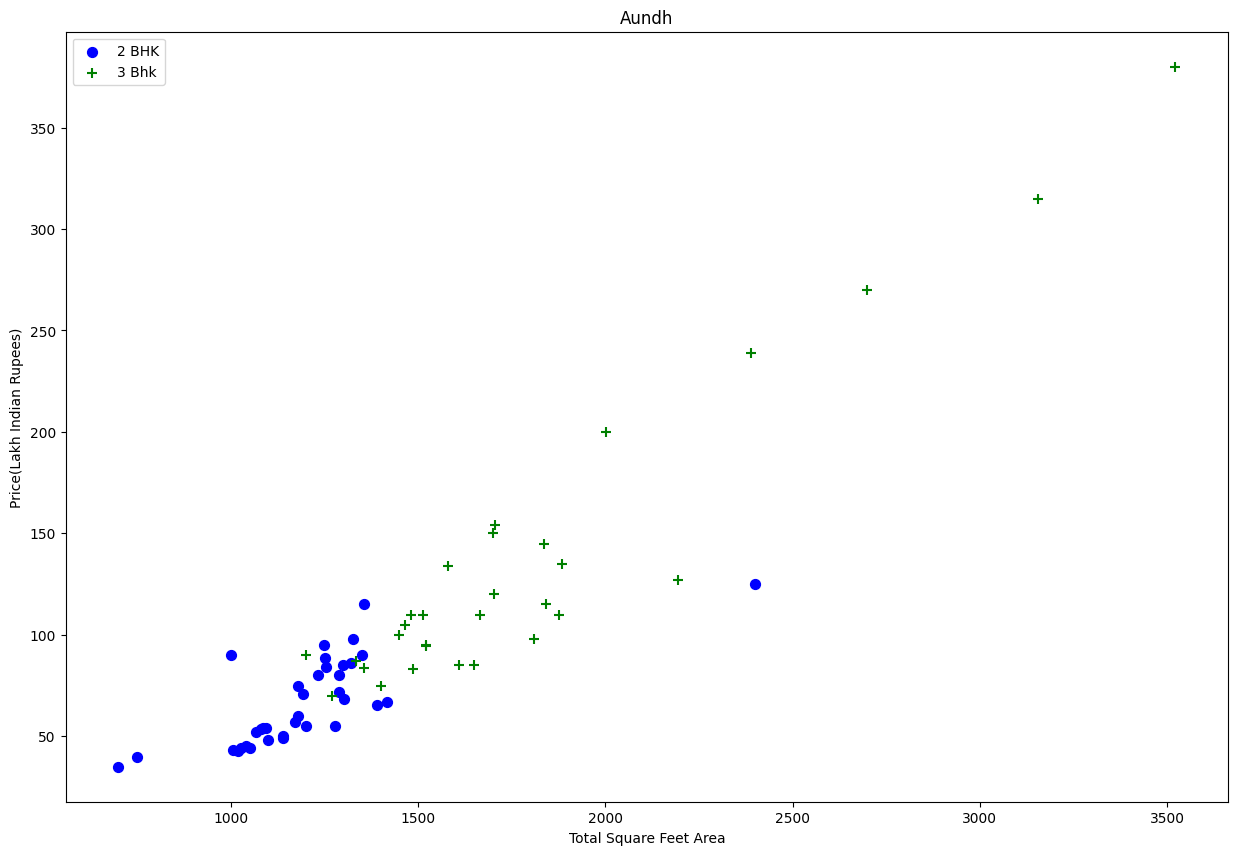

In [205]:
plot_scatter_chart(df8,"Aundh")

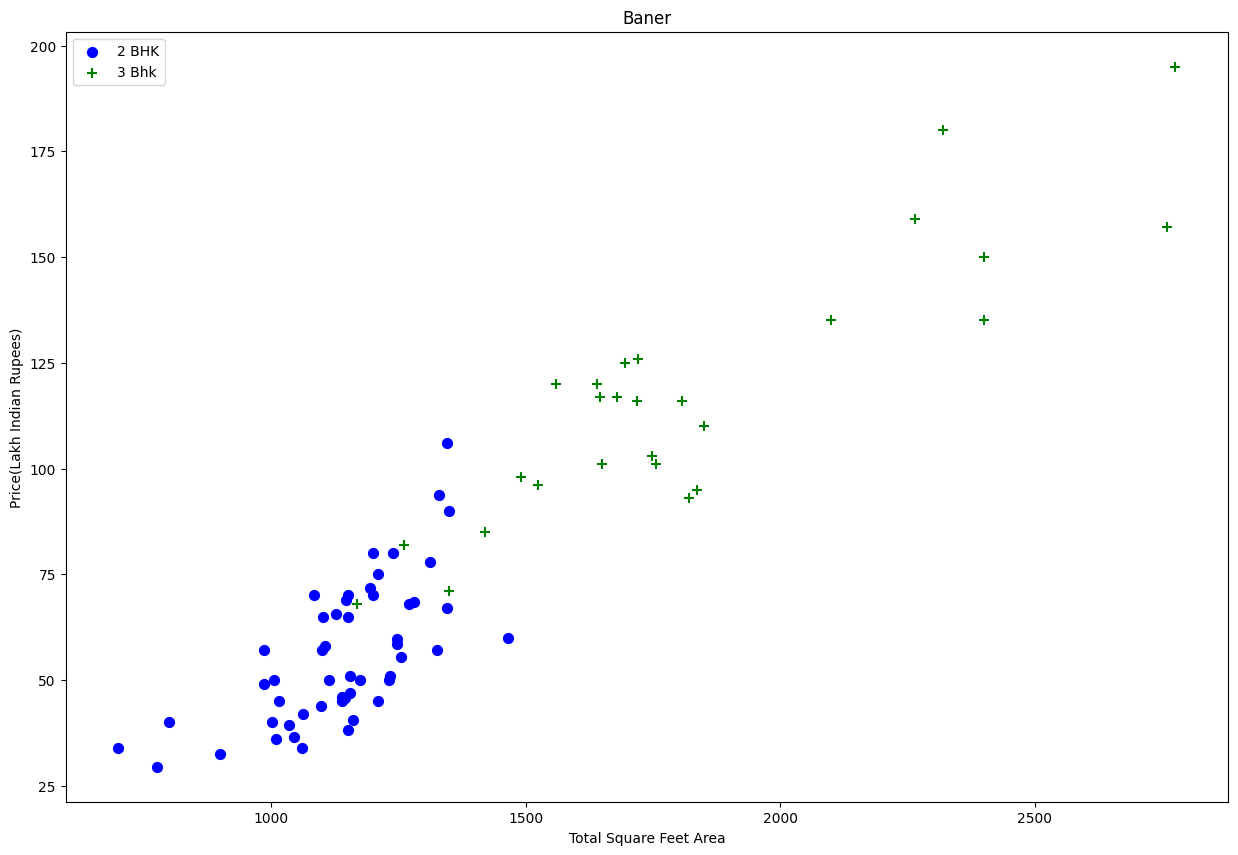

In [206]:
plot_scatter_chart(df8,"Baner")

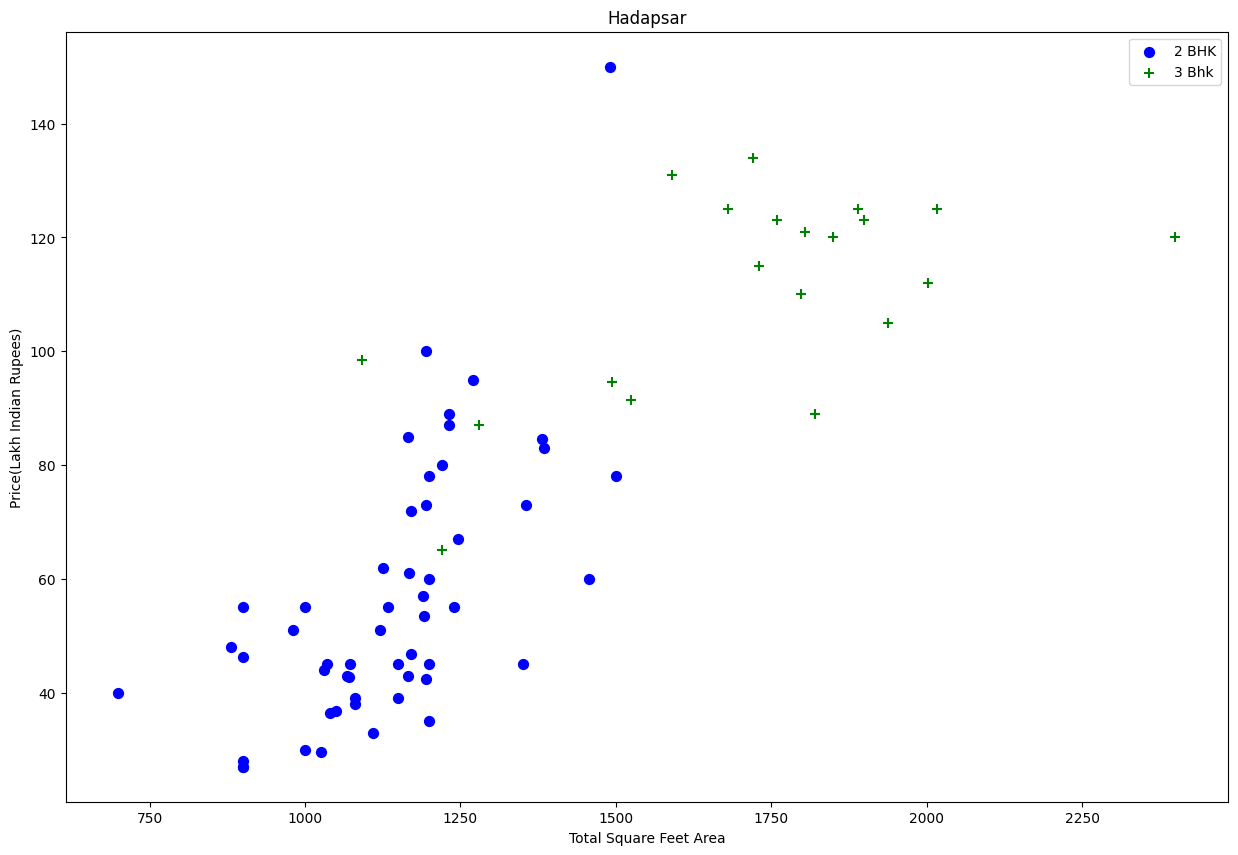

In [207]:

plot_scatter_chart(df8,"Hadapsar")

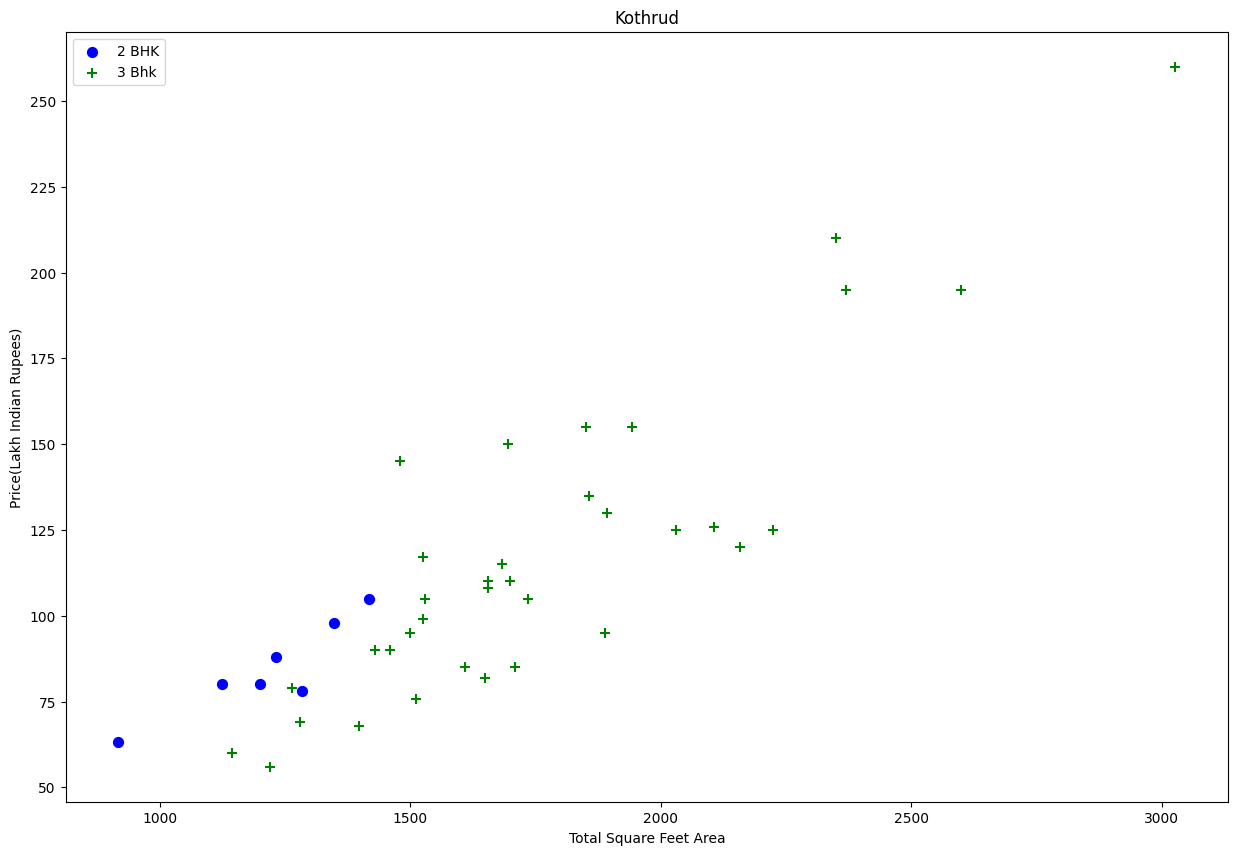

In [208]:
plot_scatter_chart(df8,"Kothrud")

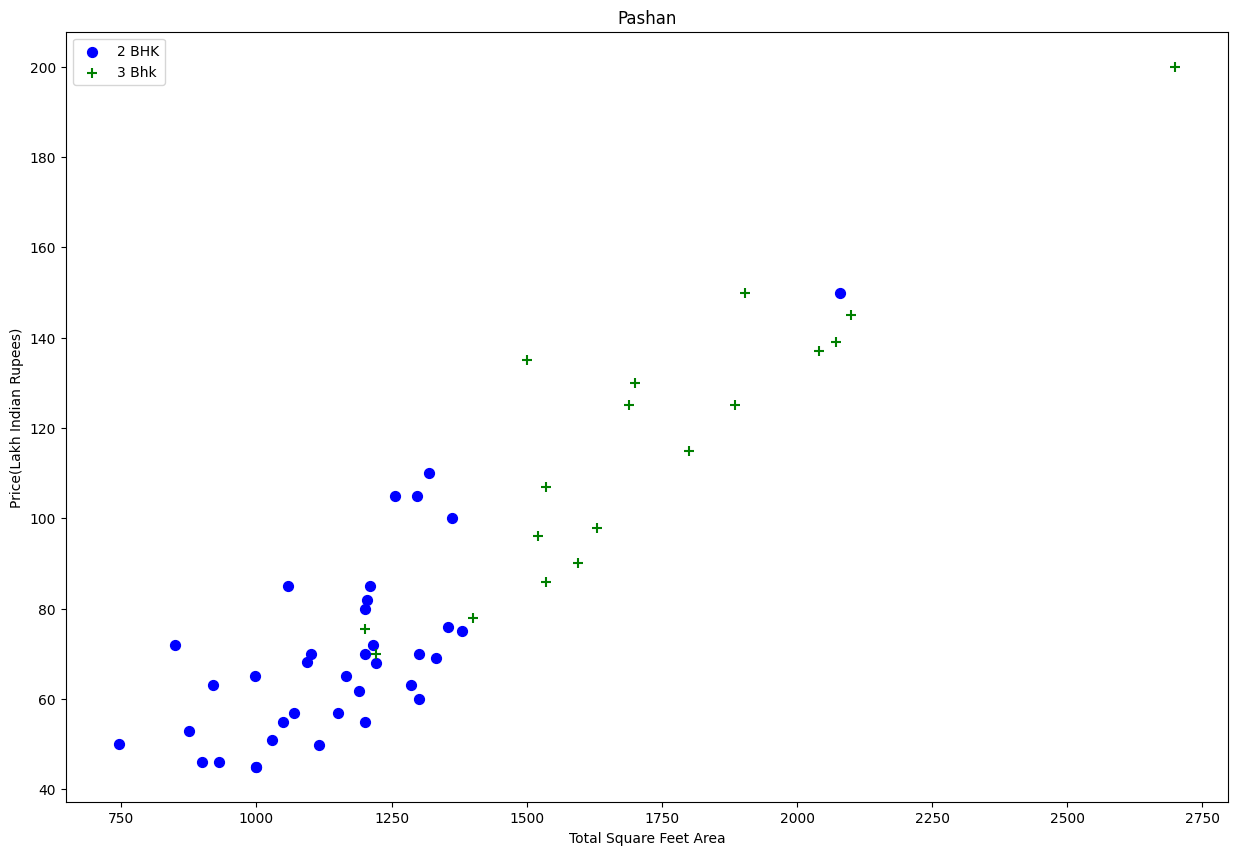

In [209]:
plot_scatter_chart(df8,"Pashan")

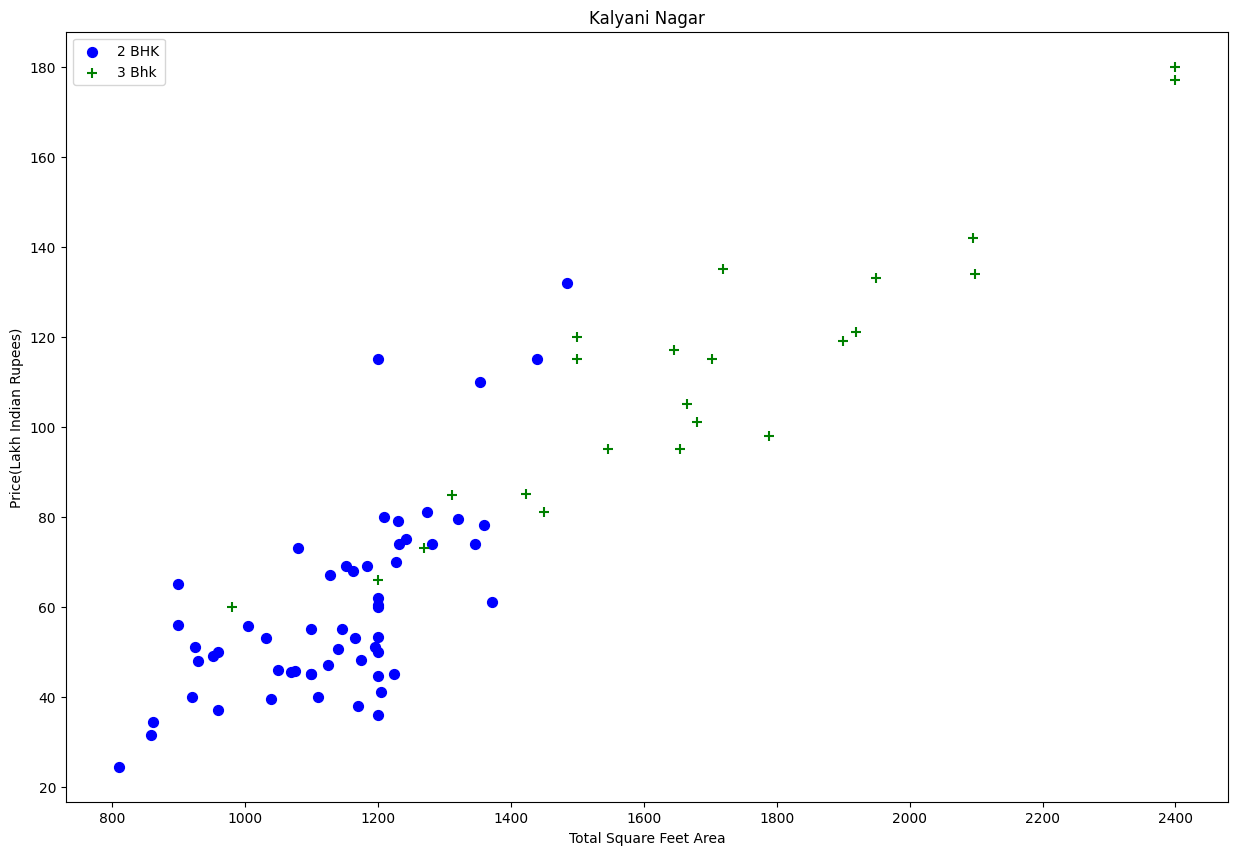

In [210]:
plot_scatter_chart(df8,"Kalyani Nagar")

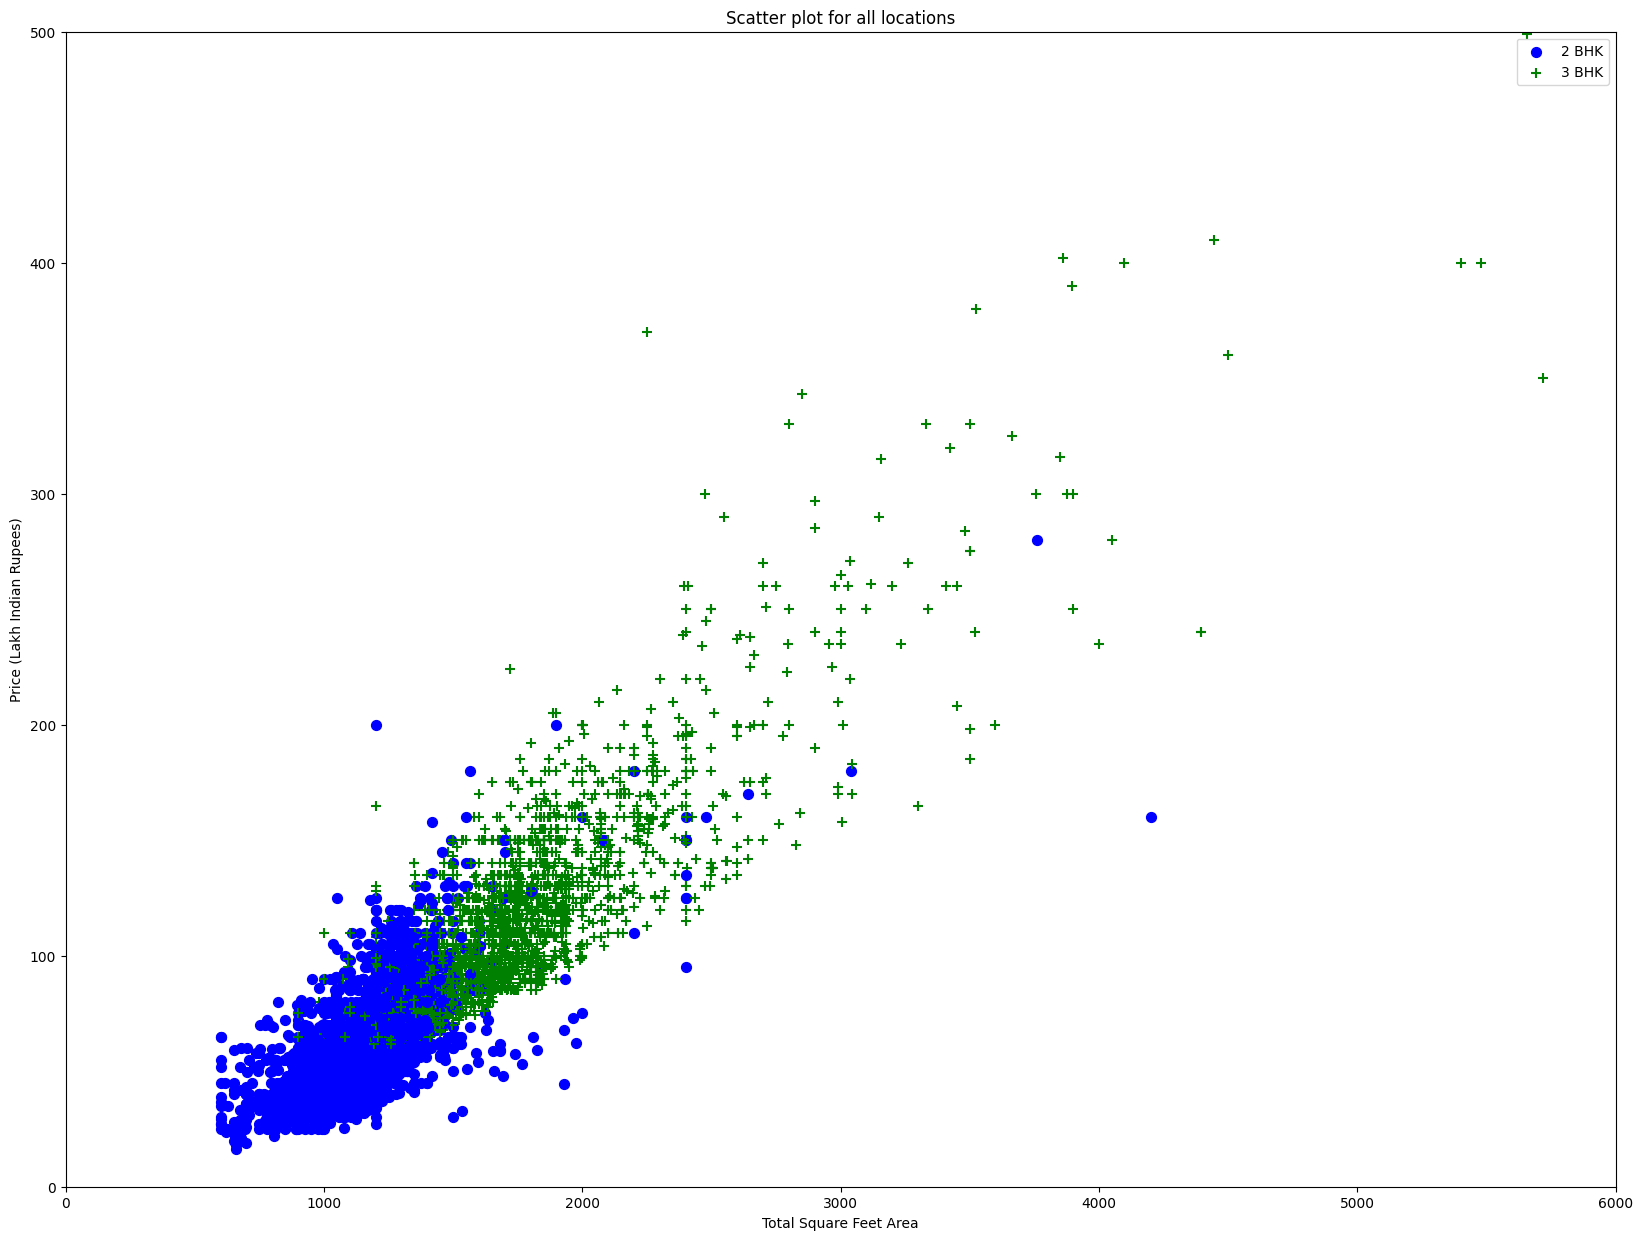

In [211]:
#plot to show total sqft area to price of all locations
def plot_scatter_chart_all_location(df):
  matplotlib.rcParams['figure.figsize'] = (20,15)
  for location in df['site_location'].unique():
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', s=50)

  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title('Scatter plot for all locations')
  plt.legend(['2 BHK', '3 BHK'])
  plt.xlim(0, 6000)
  plt.ylim(0, 500)

plot_scatter_chart_all_location(df8)

In [212]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [213]:
df8[df8.bath>10]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft,airport_distance,railway_distance
1211,11 BHK,6000.0,12.0,150.0,Bibvewadi,11,2500.000000,14,15
2638,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000,10,5
5266,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424,14,7
6348,16 BHK,10000.0,16.0,550.0,Model colony,16,5500.000000,11,2
10385,10 BHK,4000.0,12.0,160.0,Wagholi,10,4000.000000,9,9


In [214]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft,airport_distance,railway_distance
773,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330,18,5
3068,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689,9,2
4233,4 BHK,7000.0,8.0,450.0,Karve Nagar,4,6428.571429,16,4


In [215]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7531, 9)

In [216]:
df9.head(2)

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft,airport_distance,railway_distance
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606,12,6
1,4 BHK,2894.0,4.0,245.00,Alandi Road,4,8465.791292,12,6


In [217]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,total_sqft,bath,price,site_location,bhk,airport_distance,railway_distance
0,1056.0,2.0,39.07,Alandi Road,2,12,6
1,2894.0,4.0,245.00,Alandi Road,4,12,6
2,1084.0,2.0,50.00,Alandi Road,2,12,6


In [218]:
dummies = pd.get_dummies(df10.site_location)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [219]:
df11 = pd.concat([df10,dummies],axis='columns') # Concatenate df10 and dummies

# Check if 'other' column exists before dropping
if 'other' in df11.columns:
    df11 = df11.drop('other',axis='columns') # Now drop the 'other' column from the concatenated DataFrame

df11.head()

,total_sqft,bath,price,site_location,bhk,airport_distance,railway_distance,Alandi Road,Ambegaon Budruk,Anandnagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,12,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,Alandi Road,4,12,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,Alandi Road,2,12,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,80.00,Alandi Road,2,12,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5591.0,4.0,445.00,Alandi Road,4,12,6,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df5[['total_sqft', 'bath', 'price', 'price_per_sqft', 'airport_distance', 'railway_distance']] = scaler.fit_transform(df5[['total_sqft', 'bath', 'price', 'price_per_sqft', 'airport_distance', 'railway_distance']])

In [221]:
df12 = df11.drop('site_location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,airport_distance,railway_distance,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [222]:
df12.shape

(7531, 102)

In [223]:
df12

,total_sqft,bath,price,bhk,airport_distance,railway_distance,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,2,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,80.00,2,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5591.0,4.0,445.00,4,12,6,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10866,1165.0,2.0,67.00,2,6,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10871,3500.0,6.0,115.00,6,6,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10874,1050.0,2.0,54.00,2,6,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10876,1140.0,2.0,57.00,2,6,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


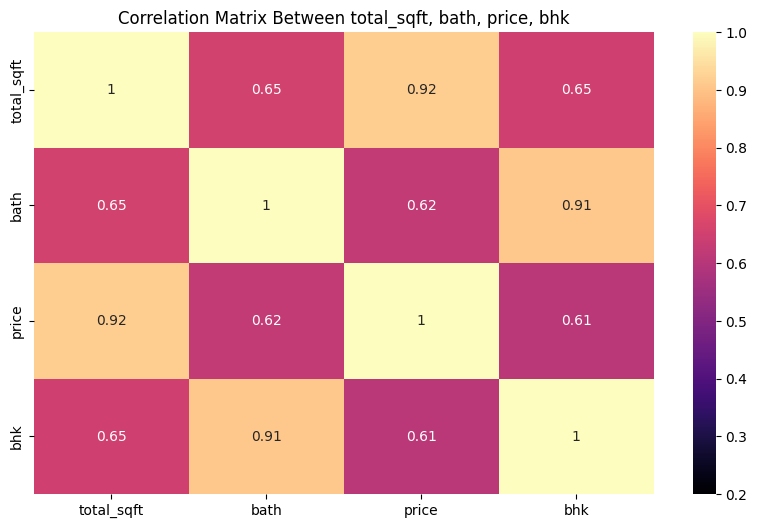

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df12[['total_sqft', 'bath', 'price', 'bhk']].corr(), annot=True, cmap='magma',vmin=0.2)
plt.title("Correlation Matrix Between total_sqft, bath, price, bhk")
plt.show()

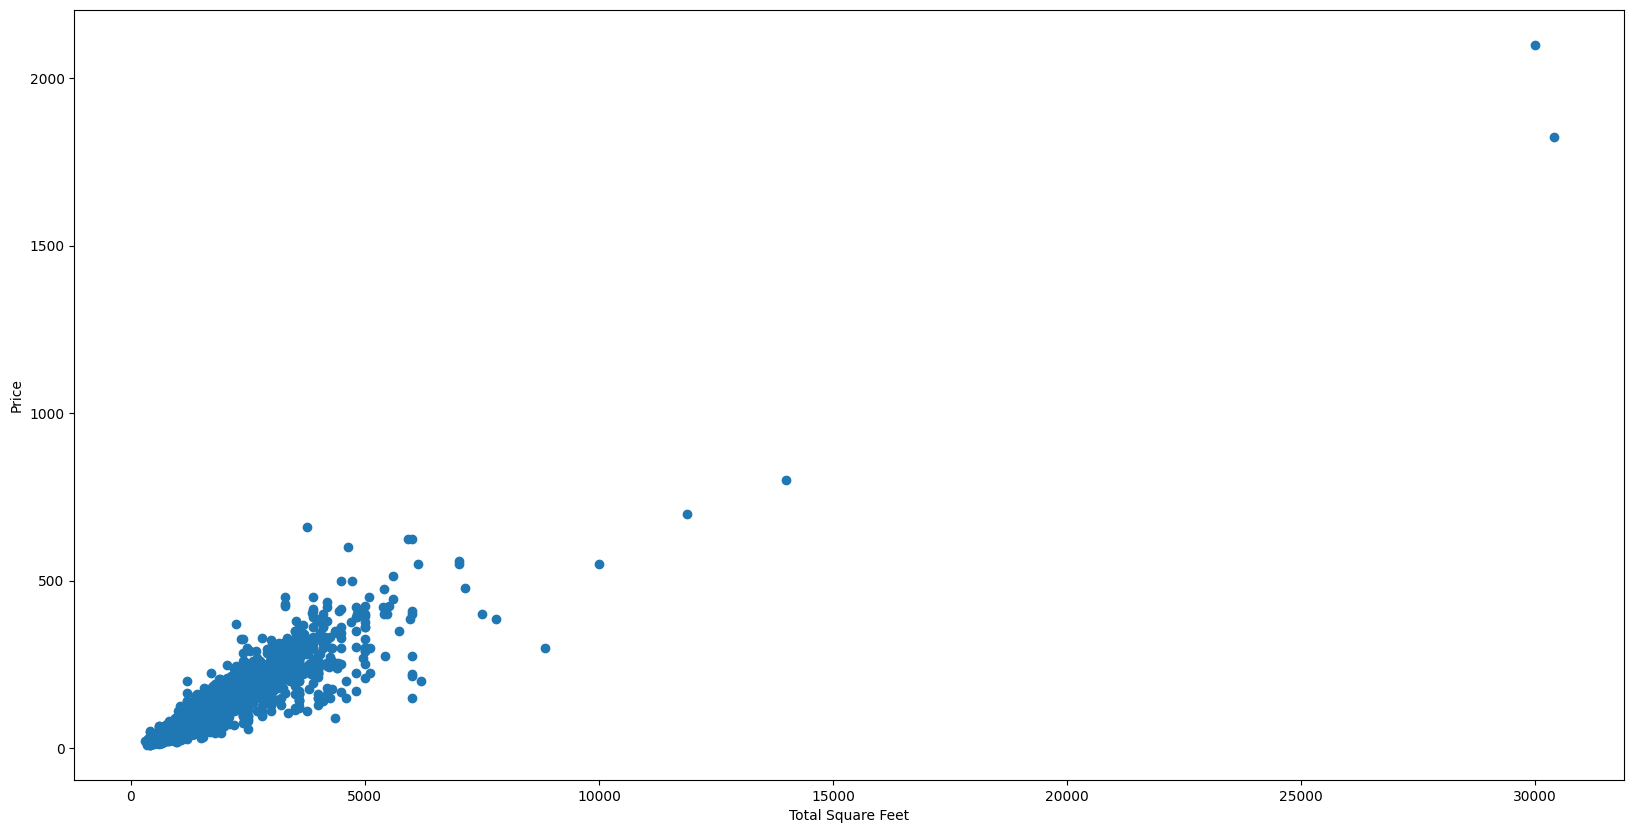

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(df12['total_sqft'], df12['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

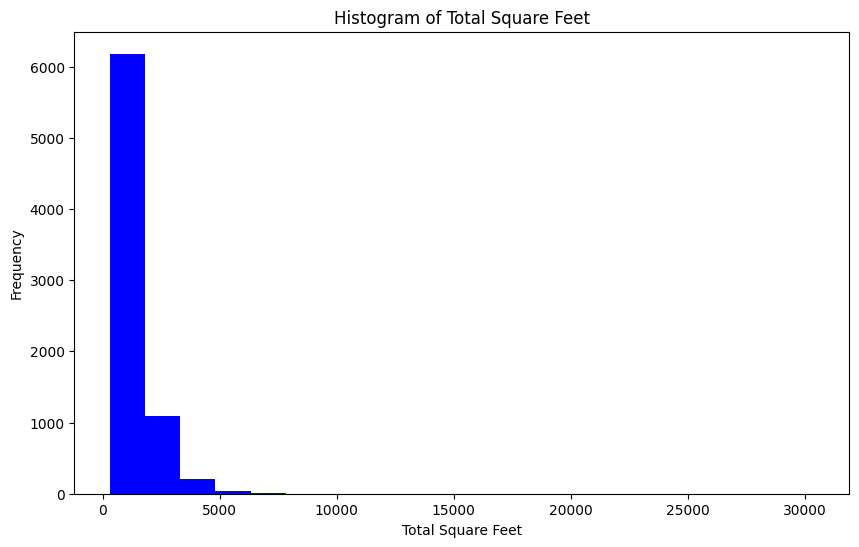

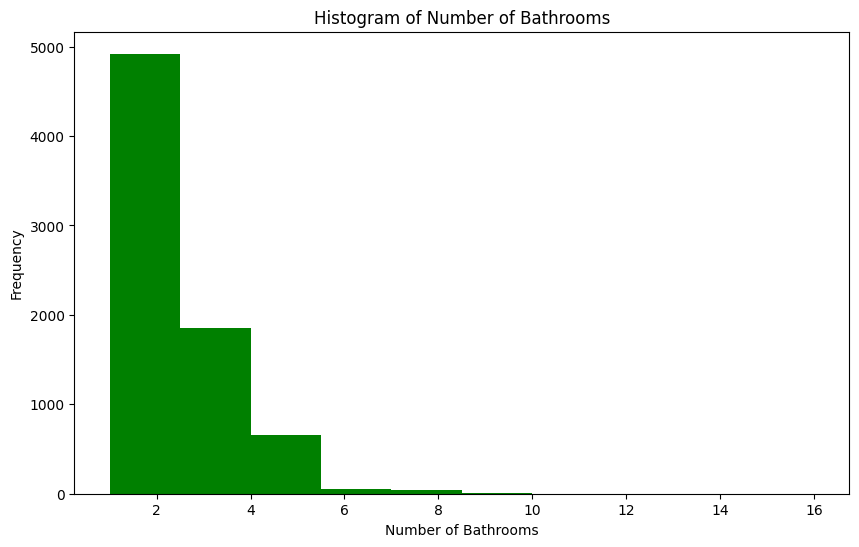

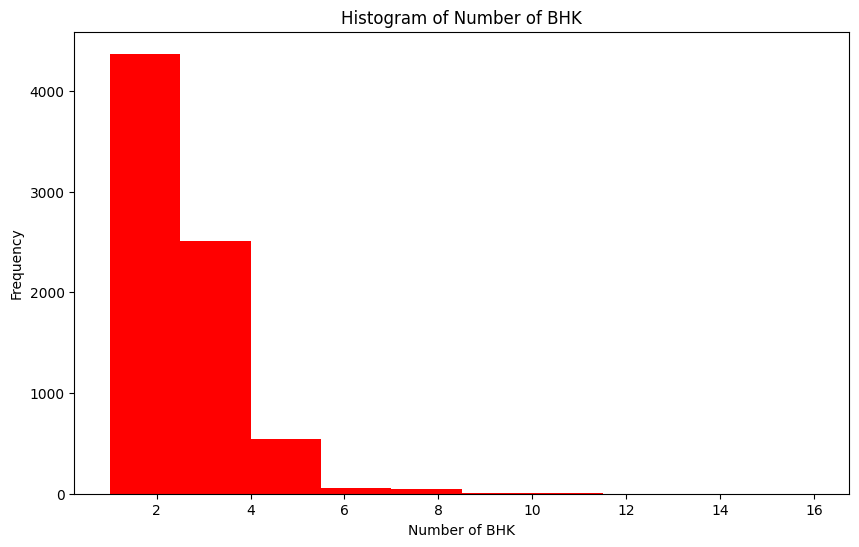

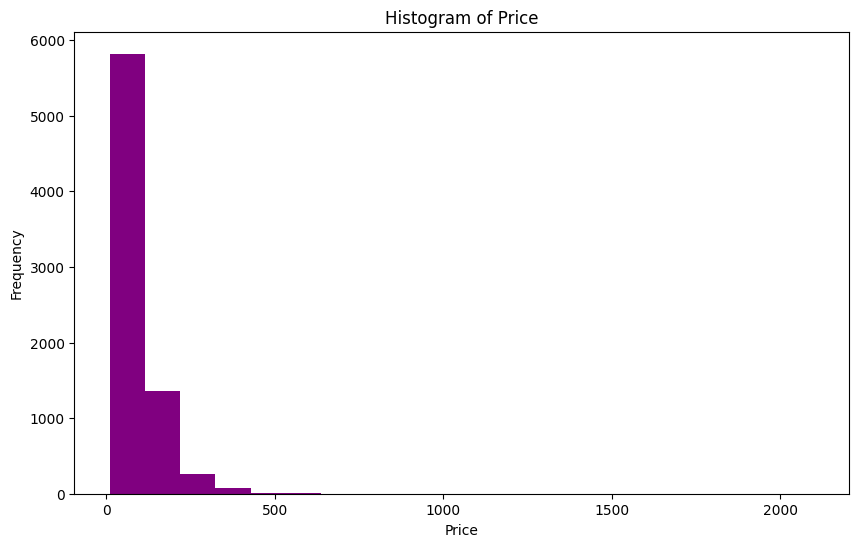

In [146]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(10, 6)) # Histogram for 'total_sqft'
plt.hist(df12['total_sqft'], bins=20, color='blue')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.title('Histogram of Total Square Feet')
plt.show()

plt.figure(figsize=(10, 6)) # Histogram for 'bath'
plt.hist(df12['bath'], bins=10, color='green')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bathrooms')
plt.show()

plt.figure(figsize=(10, 6)) # Histogram for 'bhk'
plt.hist(df12['bhk'], bins=10, color='red')
plt.xlabel('Number of BHK')
plt.ylabel('Frequency')
plt.title('Histogram of Number of BHK')
plt.show()

plt.figure(figsize=(10, 6)) # Histogram for 'price'
plt.hist(df12['price'], bins=20, color='purple')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [147]:
df12[['total_sqft', 'bath', 'price', 'bhk','airport_distance',	'railway_distance']].describe()

,total_sqft,bath,price,bhk,airport_distance,railway_distance
count,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000,7531.000000
mean,1477.940590,2.429823,91.014392,2.489045,12.610543,3.939052
std,883.758337,0.979990,69.925001,0.954047,7.473945,2.891326
min,300.000000,1.000000,10.000000,1.000000,5.000000,1.000000
25%,1097.500000,2.000000,52.000000,2.000000,9.000000,2.000000
50%,1255.000000,2.000000,75.000000,2.000000,12.000000,3.000000
75%,1660.000000,3.000000,110.000000,3.000000,14.000000,5.000000
max,30400.000000,16.000000,2100.000000,16.000000,69.000000,15.000000


In [148]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,airport_distance,railway_distance,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,12,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,12,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,12,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
X.shape

(7531, 101)

In [150]:
# @title
y = df12.price
y.head(3)

,price
0,39.07
1,245.00
2,50.00


In [151]:
len(y)

7531

In [152]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [153]:
#linear reagreesion model
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)
lr_r2 = lr_clf.score(X_test, y_test)
lr_mse= mean_squared_error(y_test, lr_predictions)
print("LinearRegression R^2 score:",lr_r2)
print("LinearRegression Mean Squared Error:",lr_mse)

LinearRegression R^2 score: 0.8150882135471095
LinearRegression Mean Squared Error: 768.2185103368986


In [154]:
# Decision Tree Regressor Model
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)


dt_r2 = dt_clf.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("DecisionTreeRegressor R^2 Score:", dt_r2)
print("DecisionTreeRegressor Mean Squared Error:", dt_mse)

DecisionTreeRegressor R^2 Score: 0.7703265595371037
DecisionTreeRegressor Mean Squared Error: 954.1814055282385


In [155]:
# K-Nearest Neighbors Regressor Model
knn_clf = KNeighborsRegressor()
knn_clf.fit(X_train, y_train)
knn_predictions = knn_clf.predict(X_test)


knn_r2 = knn_clf.score(X_test, y_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNeighborsRegressor R^2 Score:", knn_r2)
print("KNeighborsRegressor Mean Squared Error:", knn_mse)

KNeighborsRegressor R^2 Score: 0.795622350302623
KNeighborsRegressor Mean Squared Error: 849.0897016814864


In [156]:
# Random Forest Regressor
rf_clf = RandomForestRegressor(random_state=10)
rf_clf.fit(X_train, y_train)


rf_predictions = rf_clf.predict(X_test)
rf_r2 = rf_clf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("\nRandom Forest Regressor R^2 Score:", rf_r2)
print("Random Forest Regressor Mean Squared Error:", rf_mse)


Random Forest Regressor R^2 Score: 0.826879271264443
Random Forest Regressor Mean Squared Error: 719.2324020489117


In [157]:
# Cross-Validation Scores
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr_clf, X, y, cv=cv)
print("\nLinear Regression Cross-validation scores: \n", lr_cv_scores)
print("Mean Cross-validation score for Linear Regression: \n", lr_cv_scores.mean())

# Cross-validation for Decision Tree Regressor
dt_cv_scores = cross_val_score(dt_clf, X, y, cv=cv)
print("\nDecision Tree Regressor Cross-validation scores: \n", dt_cv_scores)
print("Mean Cross-validation score for Decision Tree Regressor: \n", dt_cv_scores.mean())

# Cross-validation for K-Nearest Neighbors Regressor
knn_cv_scores = cross_val_score(knn_clf, X, y, cv=cv)
print("\nK-Nearest Neighbors Regressor Cross-validation scores: \n", knn_cv_scores)
print("Mean Cross-validation score for K-Nearest Neighbors Regressor: \n", knn_cv_scores.mean())

# Cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=cv)
print("\nRandom Forest Regressor Cross-validation scores: \n", rf_cv_scores)
print("Mean Cross-validation score for Random Forest Regressor: \n", rf_cv_scores.mean())


Linear Regression Cross-validation scores: 
 [0.8478302  0.79207062 0.82899481 0.86596434 0.81296678]
Mean Cross-validation score for Linear Regression: 
 0.8295653523958663

Decision Tree Regressor Cross-validation scores: 
 [0.8130752  0.72985521 0.7770377  0.83184367 0.6950951 ]
Mean Cross-validation score for Decision Tree Regressor: 
 0.7693813785572342

K-Nearest Neighbors Regressor Cross-validation scores: 
 [0.7464613  0.79042966 0.84853612 0.76254054 0.81591825]
Mean Cross-validation score for K-Nearest Neighbors Regressor: 
 0.7927771754564017

Random Forest Regressor Cross-validation scores: 
 [0.87278145 0.82019945 0.86729875 0.87508778 0.82775997]
Mean Cross-validation score for Random Forest Regressor: 
 0.8526254789549416


In [158]:
# Compare models based on R^2 score and MSE, then return the better model's predict function
# Determining the best model
if (lr_r2 > dt_r2 and lr_r2 > knn_r2 and lr_r2 > rf_r2 and
    lr_mse < dt_mse and lr_mse < knn_mse and lr_mse < rf_mse):
    print("\nLinear Regression performs better.")
    best_model = lr_clf
elif (dt_r2 > lr_r2 and dt_r2 > knn_r2 and dt_r2 > rf_r2 and
      dt_mse < lr_mse and dt_mse < knn_mse and dt_mse < rf_mse):
    print("\nDecision Tree Regressor performs better.")
    best_model = dt_clf
elif (knn_r2 > lr_r2 and knn_r2 > dt_r2 and knn_r2 > rf_r2 and
      knn_mse < lr_mse and knn_mse < dt_mse and knn_mse < rf_mse):
    print("\nK-Nearest Neighbors performs better.")
    best_model = knn_clf
else:
    print("\nRandom Forest Regressor performs better.")
    best_model = rf_clf


Random Forest Regressor performs better.


In [159]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    z = best_model.predict([x])[0]
    print("Predicted House price is: ",z,"Lakhs \n\n")

In [160]:
predict_price('Alandi Road',1000, 2, 2)

Predicted House price is:  51.89053333333332 Lakhs 




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [161]:
predict_price('Aundh',1000,2,2)




Predicted House price is:  57.78333333333331 Lakhs 




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [162]:
import pickle
with open('House_price_prediction.pickle','wb') as f:
  pickle.dump(rf_clf,f)

In [163]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    json.dump(columns, f)
